# Chapter 6 - Decision Trees Code Reproduction

In [1]:
# Impor umum
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

# Konfigurasi plot
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Memuat dataset Iris
iris = load_iris()
X = iris.data[:, 2:] # Hanya menggunakan fitur petal length dan width
y = iris.target

# Melatih model Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

# Visualisasi pohon keputusan
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join("iris_tree.dot"), # Membuat file .dot
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

# CATATAN: Untuk mengubah file .dot menjadi file gambar (misal: PNG),
# Anda perlu menginstal Graphviz (http://www.graphviz.org/).
# Setelah itu, jalankan perintah berikut di terminal Anda:
# $ dot -Tpng iris_tree.dot -o iris_tree.png

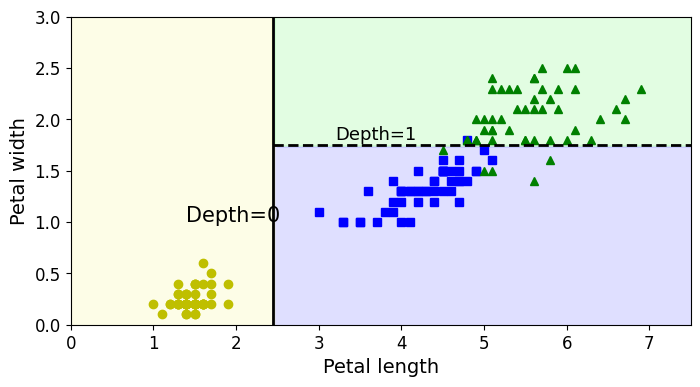

Estimasi probabilitas kelas: [[0.         0.90740741 0.09259259]]
Prediksi kelas: [1] -> ['versicolor']


In [3]:
# Fungsi untuk memplot decision boundary
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = mpl.colors.ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = mpl.colors.ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

# Plot decision boundary dari model yang telah dilatih
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.show()

# Mengestimasi probabilitas kelas
# Contoh: instance dengan petal length = 5cm dan petal width = 1.5cm
proba = tree_clf.predict_proba([[5, 1.5]])
print("Estimasi probabilitas kelas:", proba)

# Prediksi kelas
prediction = tree_clf.predict([[5, 1.5]])
print("Prediksi kelas:", prediction, "->", iris.target_names[prediction])

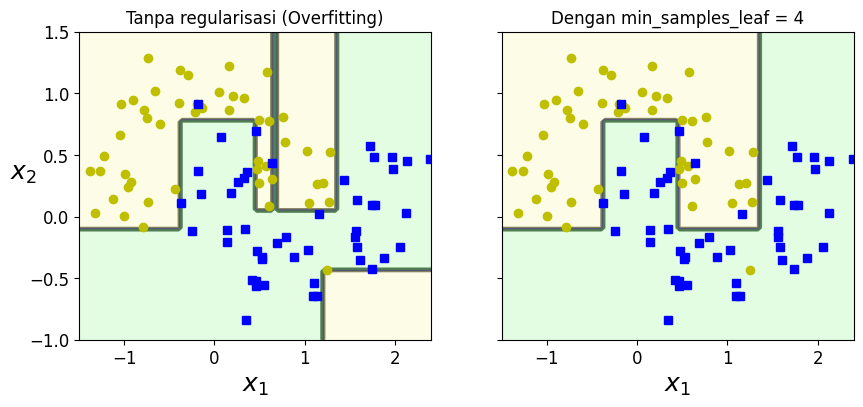

In [4]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

# Melatih dua model: satu tanpa regularisasi, satu dengan regularisasi
deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

# Memplot decision boundary kedua model
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Tanpa regularisasi (Overfitting)")
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("Dengan min_samples_leaf = 4")
plt.ylabel("")
plt.show()
# HASIL: Plot menunjukkan model dengan regularisasi (kanan) memiliki
# decision boundary yang lebih mulus dan umum daripada model yang overfitting (kiri).

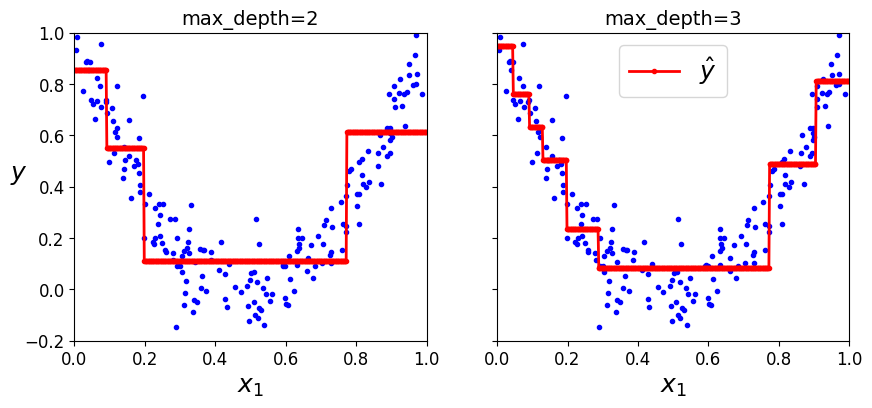

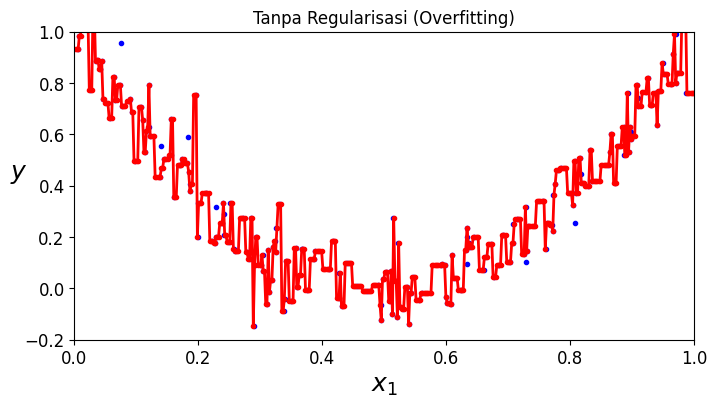

In [5]:
from sklearn.tree import DecisionTreeRegressor

# Membuat data kuadratik acak
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

# Melatih model Decision Tree Regressor
tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# Fungsi untuk memplot hasil regresi
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

# Memplot hasil regresi untuk max_depth=2 dan max_depth=3
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
plt.title("max_depth=3", fontsize=14)
plt.legend(loc="upper center", fontsize=18)
plt.show()

# Menunjukkan overfitting pada regressor tanpa regularisasi
tree_reg_overfitting = DecisionTreeRegressor(random_state=42)
tree_reg_overfitting.fit(X, y)

plt.figure(figsize=(8, 4))
plot_regression_predictions(tree_reg_overfitting, X, y)
plt.title("Tanpa Regularisasi (Overfitting)")
plt.show()